# 08_04: Comparing quantitative variables

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
gm = pd.read_csv('gapminder.csv')

In [3]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41822 entries, 0 to 41821
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           41822 non-null  object 
 1   year              41822 non-null  int64  
 2   region            41822 non-null  object 
 3   population        41822 non-null  float64
 4   life_expectancy   40629 non-null  float64
 5   age5_surviving    40490 non-null  float64
 6   babies_per_woman  41822 non-null  float64
 7   gdp_per_capita    41822 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB


In [4]:
italy = gm.query('country == "Italy"')

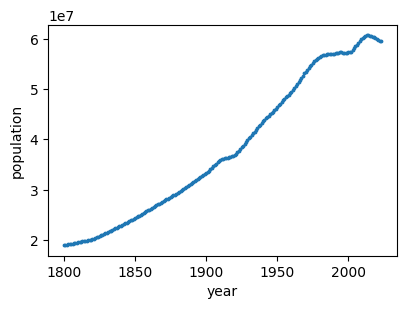

In [5]:
italy.plot.scatter(x='year', y='population', s=3, figsize=(4.5,3));

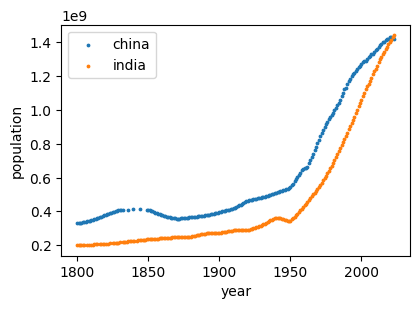

In [6]:
axes = gm.query('country == "China"').plot.scatter(x='year', y='population', label='china', c='C0', s=3, figsize=(4.5,3))
gm.query('country == "India"').plot.scatter(x='year', y='population', label='india', c='C1', s=3, ax=axes); # reuse axes

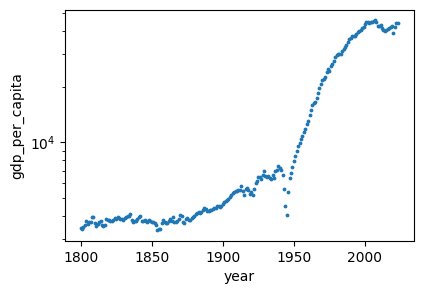

In [7]:
italy.plot.scatter('year', 'gdp_per_capita', logy=True, s=3, figsize=(4.5,3));

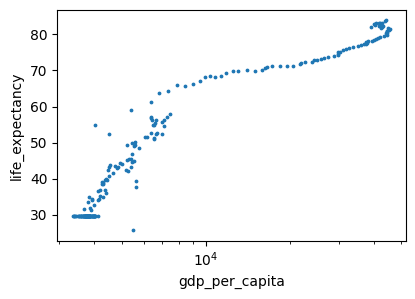

In [8]:
italy.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=3, figsize=(4.5,3));

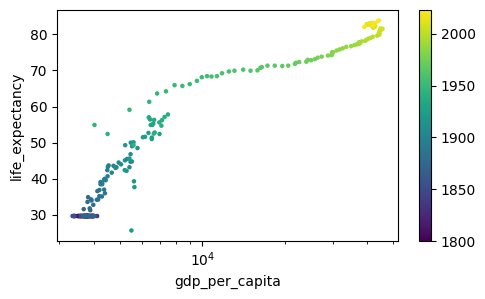

In [9]:
italy.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, c=italy.year,
                   colormap='viridis', s=5, figsize=(5.5,3));

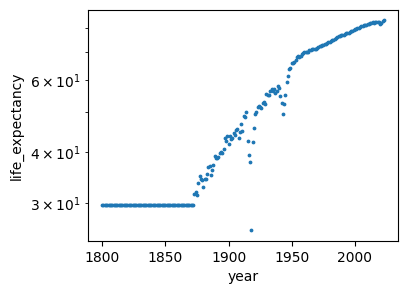

In [10]:
italy.plot.scatter('year', 'life_expectancy', logy=True, s=3, figsize=(4,3));

In [12]:
gm2015 = gm[gm.year == 2015]

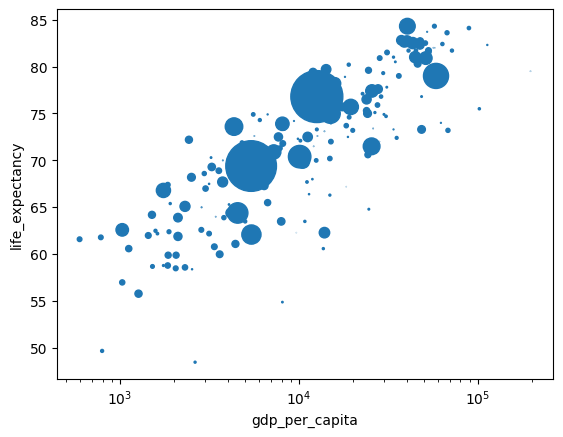

In [13]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population);

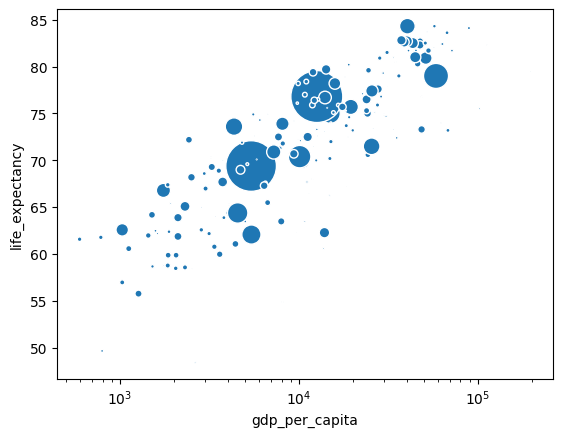

In [14]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    edgecolor='w');

In [15]:
continent = gm2015.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral', 'Oceania': 'teal'})
continent

199          coral
423           gold
647        skyblue
858           gold
1082       skyblue
           ...    
40960    palegreen
41183        coral
41381        coral
41605      skyblue
41813      skyblue
Name: region, Length: 195, dtype: object

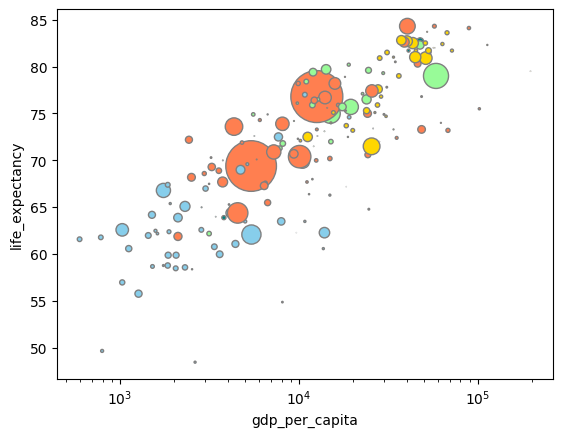

In [16]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    c=continent, edgecolor='gray');

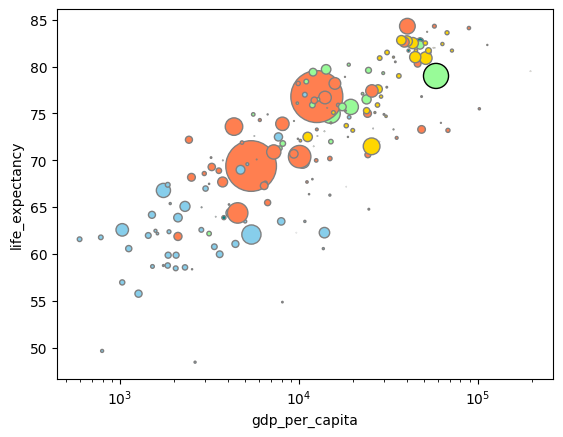

In [17]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    c=continent, edgecolor=np.where(gm2015.country == "USA", 'black', 'gray'));

In [20]:
def plotyear(year, country):
    gm[gm.year == year].plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                                     c=continent, edgecolor=np.where(gm2015.country == country, 'black', 'gray'));
    pp.axis(xmin=200, xmax=200000, ymin=15, ymax=90); # fix the plotting ranges

In [18]:
from ipywidgets import interactive, widgets

In [21]:
interactive_plot = interactive(plotyear,
                               year=widgets.IntSlider(min=1950, max=2023, step=1, value=1950),
                               country=widgets.Dropdown(options=['USA', 'China', 'India']))

# some versions of Jupyter require workaround to keep the figure from jumping around
# interactive_plot.children[-1].layout.height = '400px'
interactive_plot

interactive(children=(IntSlider(value=1950, description='year', max=2023, min=1950), Dropdown(description='cou…